

# **Clustering - Mall Customer Segmentation**


## **Install and Import Libraries**

Category encoders digunakan untuk merubah data katagorikal menjadi data numerik.

In [ ]:
# Install Category Encoders
! pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install kneed
from kneed import DataGenerator, KneeLocator

Digunakan untuk mengunduh dan menginstal paket "kneed".
Paket "kneed" memerlukan dua modul, yaitu "DataGenerator" dan "KneeLocator", yang diimpor dari paket "kneed".

***Import Libraries***

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.cm as cm
from scipy import stats

import os
import warnings
warnings.filterwarnings("ignore")

- **from sklearn.preprocessing import StandardScaler**
Ini mengimpor kelas StandardScaler dari modul sklearn.preprocessing.
StandardScaler adalah alat untuk standarisasi fitur dengan mengurangi nilai mean dan membagi dengan standar deviasi.
- **from sklearn.cluster import KMeans**
Ini mengimpor kelas KMeans dari modul sklearn.cluster.
KMeans adalah algoritma clustering yang akan digunakan untuk mengelompokkan data.
- **from sklearn.metrics import silhouette_samples, silhouette_score**
Ini mengimpor dua fungsi, silhouette_samples dan silhouette_score, dari modul sklearn.metrics.
Fungsi-fungsi ini akan digunakan untuk menghitung skor silhouette, yang mengukur seberapa baik setiap sampel ditempatkan dalam clusternya.

from sklearn.preprocessing import StandardScaler : import kmeans
dll...

## **Import Data dan Menampilkan Data Set**

In [ ]:
#import Dataset
from google.colab import files
uploaded = files.upload()

Saving mall_customer.csv to mall_customer.csv


In [ ]:
#import data to Google Colab
import pandas as pd
df_customer = pd.read_csv('mall_customer.csv', sep=';')

In [ ]:
#Check our dataset
df_customer

,customer,gender,age,ann_income_kUSD,spending_score
0,1,female,19,15,10
1,2,female,21,15,81
2,3,male,20,15,18
3,4,male,23,16,77
4,5,female,31,16,40
...,...,...,...,...,...
195,196,female,35,120,79
196,197,male,45,126,28
197,198,male,32,126,74
198,199,male,32,137,18


Interprestasi dalam 5 colum :  Customer 1 dengan usia 19 dengan income tahunan 15 USD dan spending score 10.

terdapat 200 data dengan 5 columns yaitu customer, gender, age, ann_income_kUSD, spending_score


# **Melihat informasi descriptive statistics**

In [ ]:
# Prints the Dataset Information
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer         200 non-null    int64 
 1   gender           200 non-null    object
 2   age              200 non-null    int64 
 3   ann_income_kUSD  200 non-null    int64 
 4   spending_score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Interprestasi : terdapat 200 data dengan 5 columns dalam columns customer terdapat 200 data dengan tingkat eror nol dengan type data int64 (Jelaskan Semua Columns)

Dari semua data sebanyak 4 data dengan type int64 dan 1 data bertype data object

# **Ubah nama kolom menjadi lebih sederhana, untuk menghindari kesalahanpengentikan karena python sangatlah sensitive mengenali lower dan upper case. Lalu tampilkan deskripsi statistiknya.**

In [ ]:
#rename head of Dataset
df_customer.rename(index=str, columns={'ann_income_kUSD': 'income',
                              'spending_score': 'score'}, inplace=True)
df_customer.head()

,customer,gender,age,income,score
0,1,female,19,15,10
1,2,female,21,15,81
2,3,male,20,15,18
3,4,male,23,16,77
4,5,female,31,16,40


*Interprestasi* : dari perubahan ini yang berubah adalah columns ann_incomekUSD menjadi columns income

**Melihat informasi dari data mall_customer untuk melihat min, max, std, dll**

In [ ]:
# Prints Descriptive Statistics
df_customer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
income,200.0,60.55,26.281765,15.0,41.50,61.5,78.00,137.0
score,200.0,50.36,26.154554,1.0,33.50,50.0,73.00,99.0


Interprestasi :

# **CLUSTERING**

***Visualize Data using Pairplot***

In [ ]:
import random
import torch
import torch.nn as nn


In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


In [ ]:
set_seed(43)


In [ ]:
# Let's see our data in a detailed way with pairplot
X = df_customer.drop(['customer', 'gender'], axis=1)

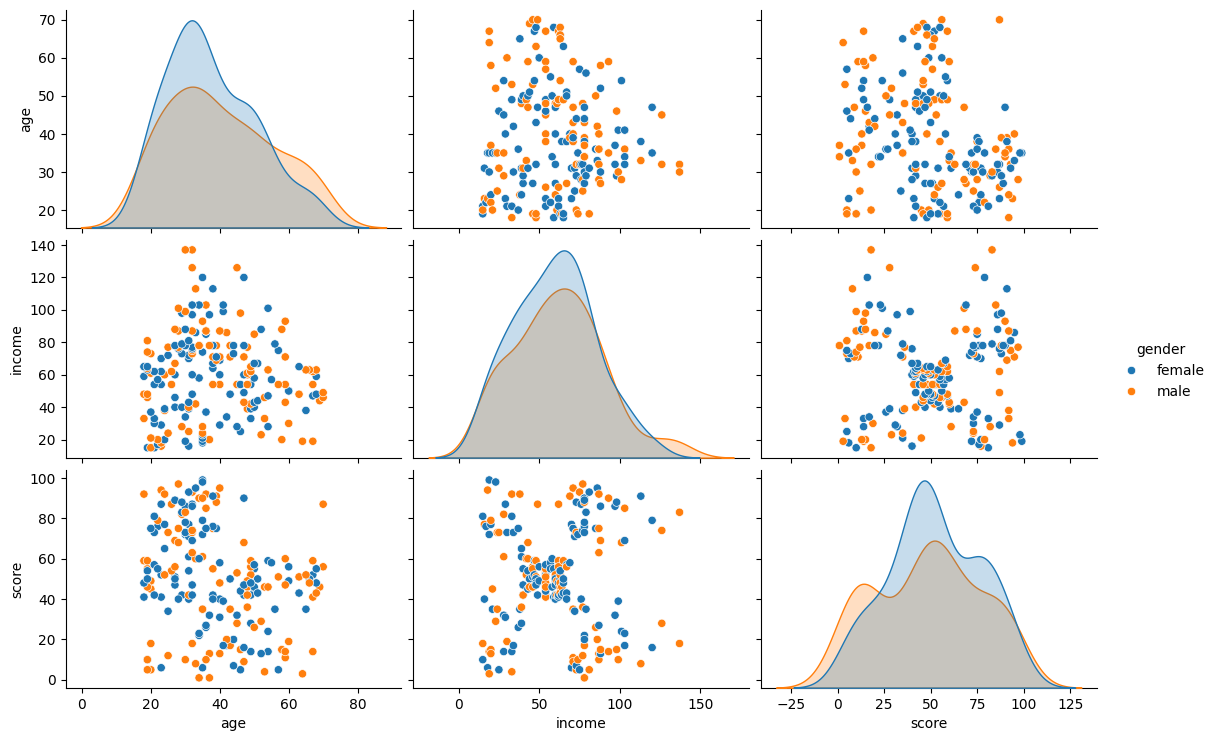

In [ ]:
sns.pairplot(df_customer.drop('customer', axis=1), hue='gender', aspect=1.5)
plt.show()

Interprestasi :
Hasil visualisasi pairplot. Visualisasi ini menggambarkan hubungan antar variabel dalam data memahami perilaku pembelian. Faktor-faktor yang digunakan dalam data ini adalah usia, pendapatan dan pembelian. Customer dan income saling berkaitan dan memiliki pengaruh terhadap Spending Score (score). Kita analisis dari distribusi variabelnya terlebih dahulu, dari pairplot ini dapat
dipahami bahwa:
- age : Mayoritas pembeli berusia 20-60 tahun dengan uncak sekitar berusia 30-27 tahun
- income : ebagian besar pendapatan berkisar 20-100 USD dengan beberapa outliner di atas 100-140 USD
- Score : Skore Melakukan pembelian antara range indek 0-60 namun beberapa kasus mencapai 60-100

Hubungan antara variable dapat di pahami bahwa
- Age vs income : terdapat hubungan positif antara umur 30-60 memiliki pendapatan yang tinggi yang berpengaruh terhadap minat belanja
- age vs Score : terdapat hubungan yang cukup positif antara umur 20-50 memiliki minat belanja yang cukup tinggi yang terpengaruh dengan pendapatan
- income vs Score : terdapat hubungan yang positif antara pendapatn 20-80 USD memiliki minat belanja yang tinggi yang terpengaruh oleh umur


***Visualize Data using Scatterplot***

Text(43.024576388888875, 0.5, 'Spending Score')

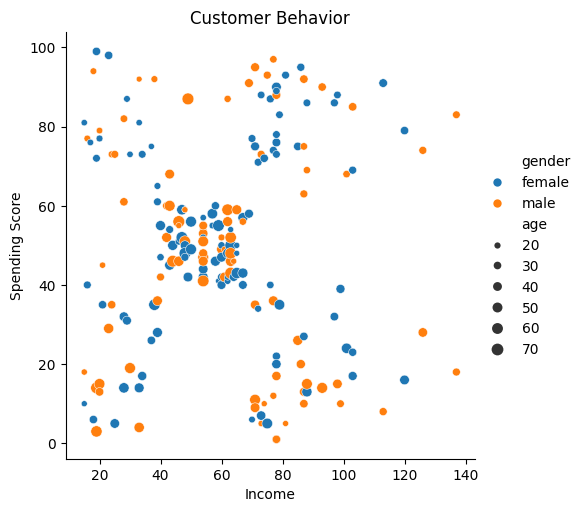

In [ ]:
# Draw Scatter Plot
sns.relplot(x='income', y='score', hue='gender', size='age', kind='scatter', data=df_customer)
plt.title('Customer Behavior')
plt.xlabel('Income')
plt.ylabel('Spending Score')

Secara umum, terlihat pola sebaran data yang membentuk "sarang lebah", mengindikasikan adanya korelasi positif antara pendapatan dan skor belanja. Namun, terdapat cukup banyak variasi individual, dengan beberapa outlier yaitu pelanggan dengan pendapatan tinggi namun skor belanja rendah, atau sebaliknya, yang menunjukkan pelanggan dengan profil yang berbeda.

Terdapat pemisahan yang jelas antara pelanggan laki-laki dan perempuan. Pelanggan perempuan cenderung memiliki rentang pendapatan dan skor belanja yang lebih terpusat, sedangkan pelanggan laki-laki memiliki variasi yang lebih luas. Usia juga tampak berpengaruh, dengan pelanggan yang lebih tua cenderung memiliki pendapatan dan skor belanja yang lebih tinggi.

***Visualize Correlation between Features***

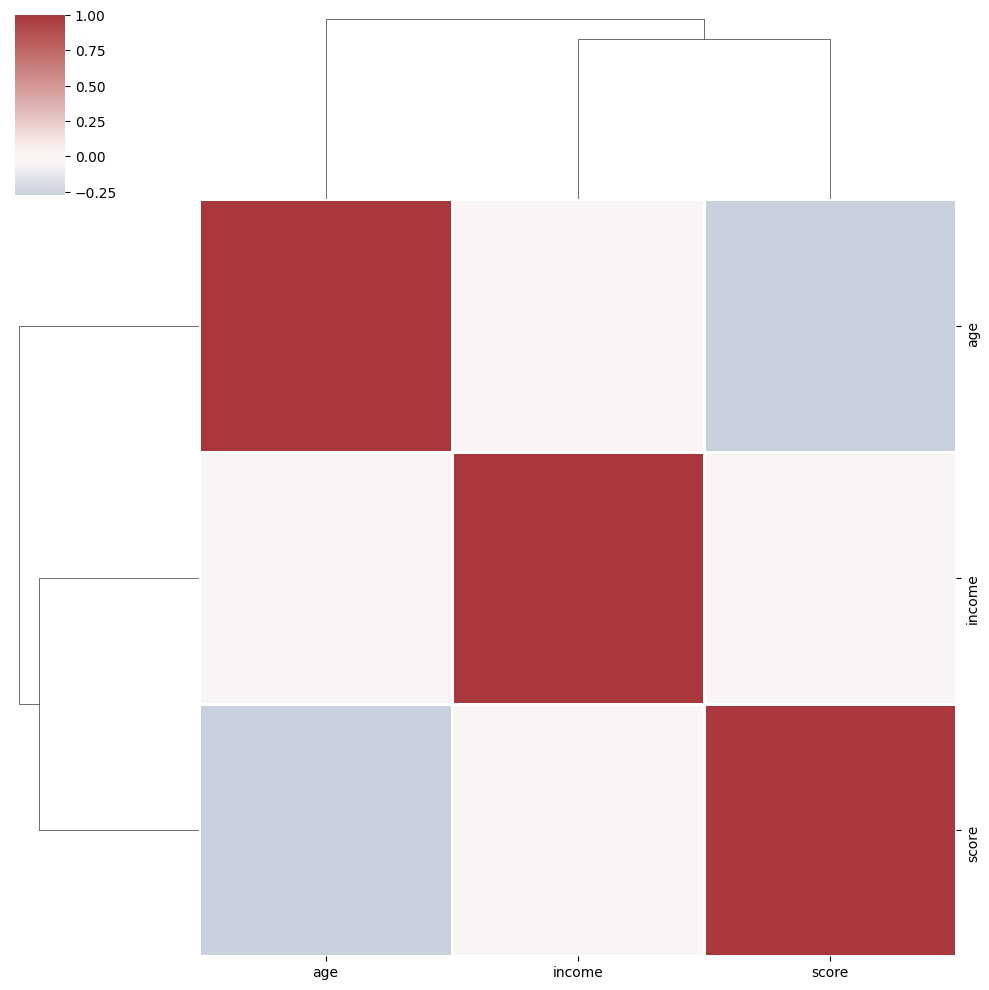

In [ ]:
# Draw Correlation to see hierarchically clustered heatmap
sns.clustermap(X.corr(), center=0, cmap='vlag', linewidths=.75)

Hasil visualisasi peta korelasi (heatmap), Heatmap ini memperkuat dan
mengkuantifikasi beberapa pola yang terlihat dalam pairplot, terutama hubungan kuat antara age dan income , serta hubungan lemah antara age dengan score. Kita bisa lihat dari korelasi antar variabelnya:
1. age dan income : korelasi positif (warna merah muda agak pudar).
2. age dan score memiliki korelasi yang sangat lemah ( warna abu abu)

## **Data Preprocessing**

***Handling Missing Values***

In [ ]:
# Check for Missing Values
df_customer.isnull().sum()

,0
customer,0
gender,0
age,0
income,0
score,0


In [ ]:
#datashape ( we have 200 list of data with 3 data head)
df_customer.shape

(200, 5)

Seleksi kolom untuk target ada pemodelan, kita menyeleksi kolom 2,3, dan 4 dengan fungsi iloc dataframe. Lalu subset dengan variable angka.
Iloc dataframe digunakan untuk memilih baris dan kolom dalam urutan yang akan muncul pada data frame.


In [ ]:
#selecting feature (use iloc iloc as integer index-based. So here, we have to specify rows and columns by their integer index.)
# 3 column of income, 4 column of score
X_numerics = df_customer.iloc[:,[3,4]].values

In [ ]:
Z_numerics = df_customer[['income', 'score']] # subset with numerical only

In [ ]:
Z_numerics

,income,score
0,15,10
1,15,81
2,15,18
3,16,77
4,16,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Iloc yang digunakan adalah kolom 3 dan 4 sehingga data yang keluar adalah data income dan data score yang memiliki banyak data sebanyak 200 data dengan 2 columns

## K-MEANS

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi.

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(Z_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(Z_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

# **Visualisasikan hasil elbow methode dan periksa jumlah cluster berdasarkan metode**

In [ ]:
#Determine the optimal number of cluster
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Z_numerics)
    wcss.append(kmeans.inertia_)
kl = KneeLocator(
    range(1,11), wcss, curve="convex", direction= "decreasing")
kl.elbow

5

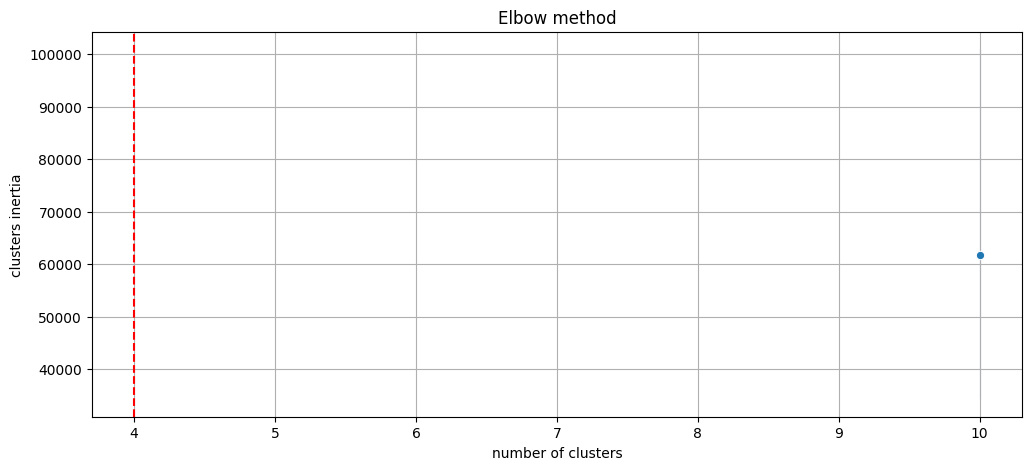

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

Grafik ini menjelaskan bahwa ini adalah implementasi dari metode Elbow untuk menentukan jumlah cluster optimal.
- Sumbu X menunjukkan jumlah cluster yang dicoba, mulai dari 1 hingga 10.
- Sumbu Y menunjukkan nilai inertia (Within-Cluster Sum of Squares atau WCSS) untuk setiap jumlah cluster. Inertia adalah ukuran untuk mengetahui seberapa kompak atau kohesif sebuah cluster.
- Berdasarkan grafik, titik "elbow" terlihat pada saat jumlah cluster mencapai 5. Ini mengindikasikan bahwa jumlah cluster optimal untuk dataset ini adalah 5, karena penambahan cluster setelah 5 tidak lagi memberikan perbaikan yang signifikan terhadap nilai inertia.

**Let's see the silhouette score**

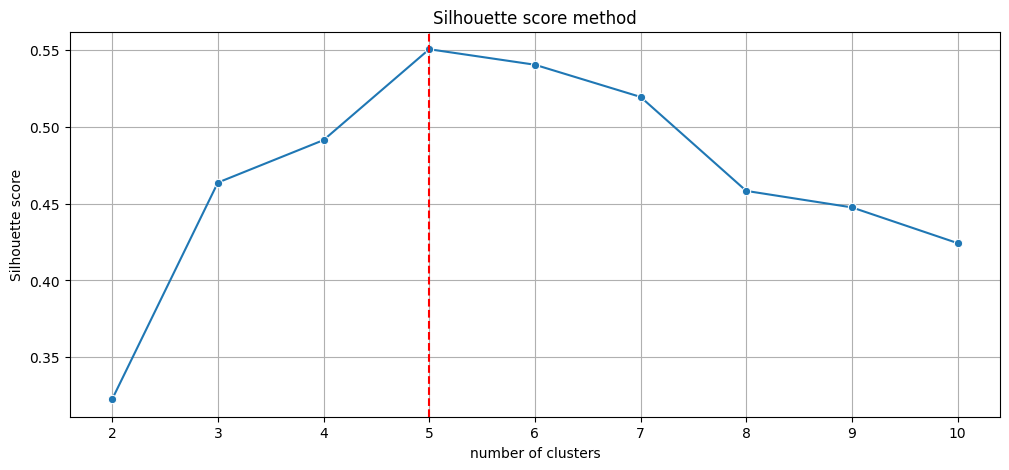

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

"Silhouette score" untuk menentukan jumlah klaster optimal dalam suatu dataset.
- Grafik menampilkan skor Silhouette untuk berbagai jumlah klaster, dari 2 hingga 10. Skor Silhouette digambarkan sebagai garis dengan lingkaran yang mewakili setiap titik data.

Interpretasi dari grafik:
- Skor Silhouette dimulai dari sekitar 0,38 untuk 2 klaster, kemudian meningkat mencapai puncak sekitar 0,55 pada 5 klaster. Setelah 5 klaster, skor Silhouette menurun, menunjukkan bahwa kualitas pengelompokan mulai memburuk dengan semakin banyak klaster.
- Garis tegak putus-putus berwarna merah pada 5 klaster menyarankan bahwa jumlah klaster optimal dalam dataset ini adalah 5, karena pada titik ini skor Silhouette mencapai nilai tertinggi.

In [ ]:
x = df_customer.iloc[:,[3,4]].values

For n_clusters = 2 The average silhouette_score is : 0.37371366304248604
For n_clusters = 3 The average silhouette_score is : 0.4636138647535812
For n_clusters = 4 The average silhouette_score is : 0.4163108919087584
For n_clusters = 5 The average silhouette_score is : 0.550339772174294
For n_clusters = 6 The average silhouette_score is : 0.5402498169001342
For n_clusters = 7 The average silhouette_score is : 0.46528466159403364
For n_clusters = 8 The average silhouette_score is : 0.49247656039513293
For n_clusters = 9 The average silhouette_score is : 0.4668098763038981
For n_clusters = 10 The average silhouette_score is : 0.44212731918355


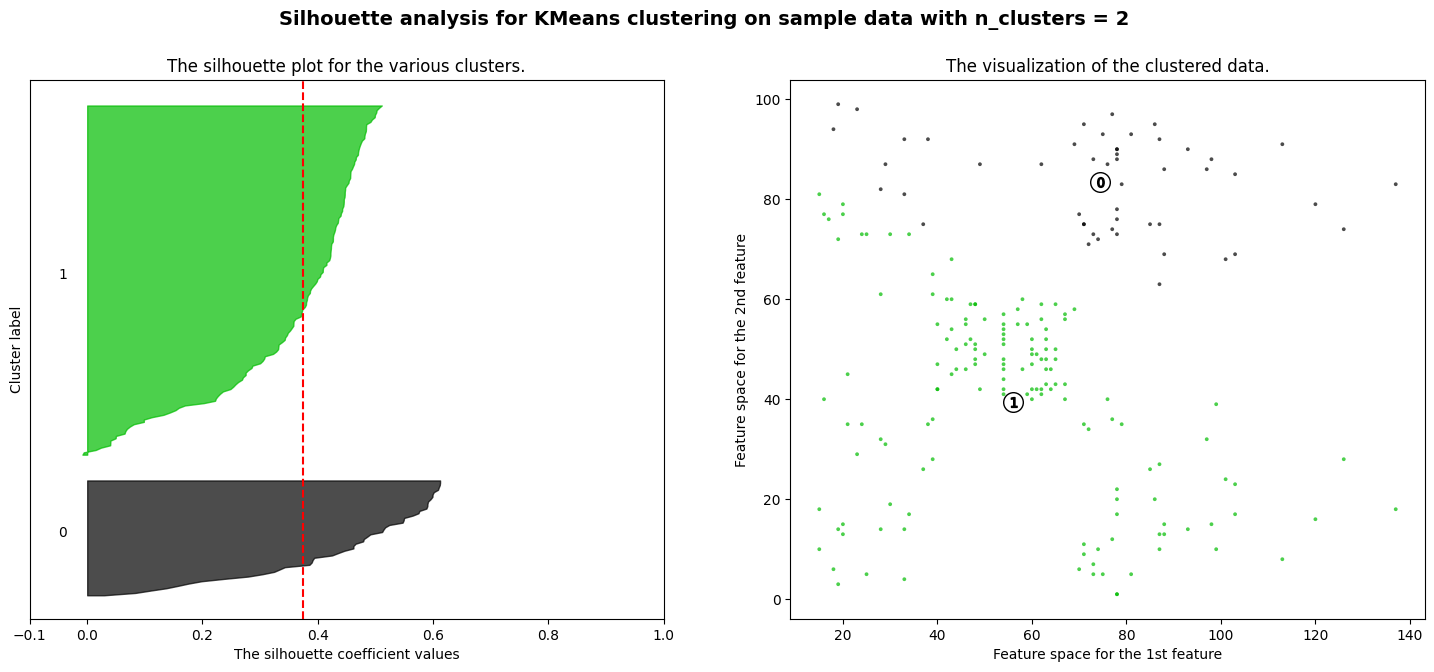

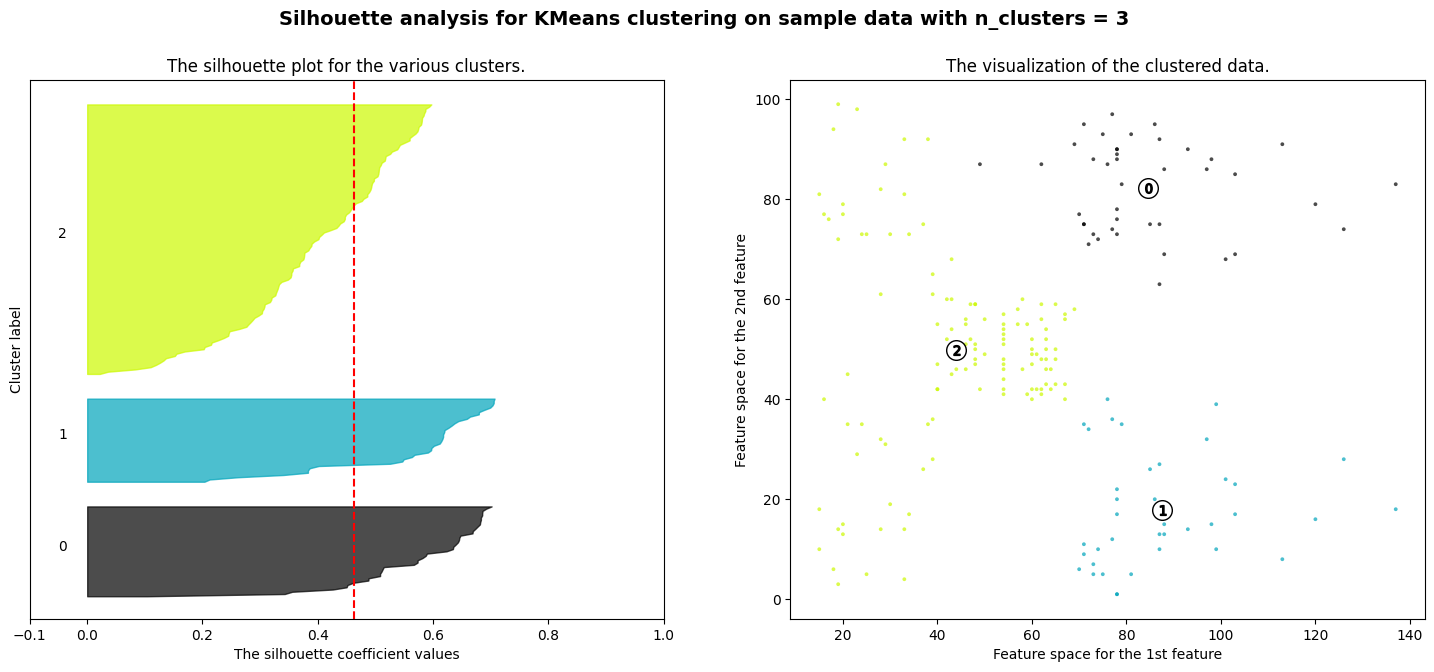

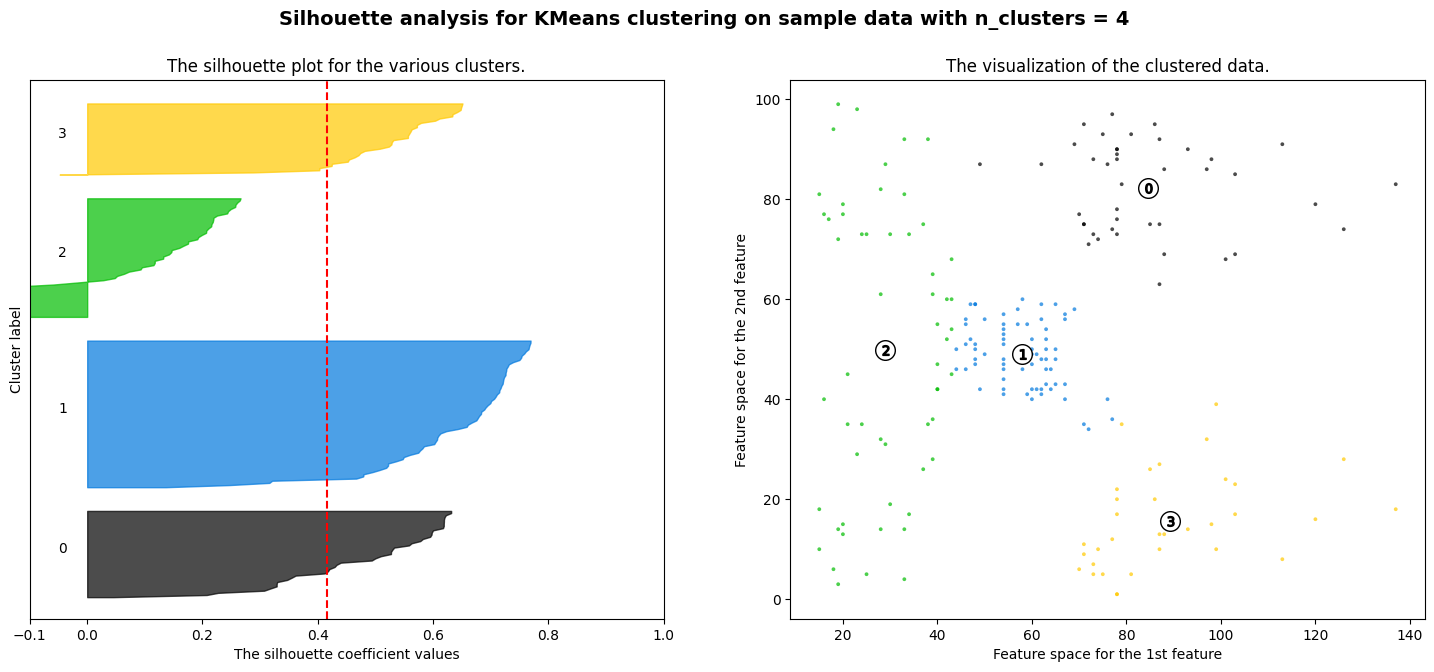

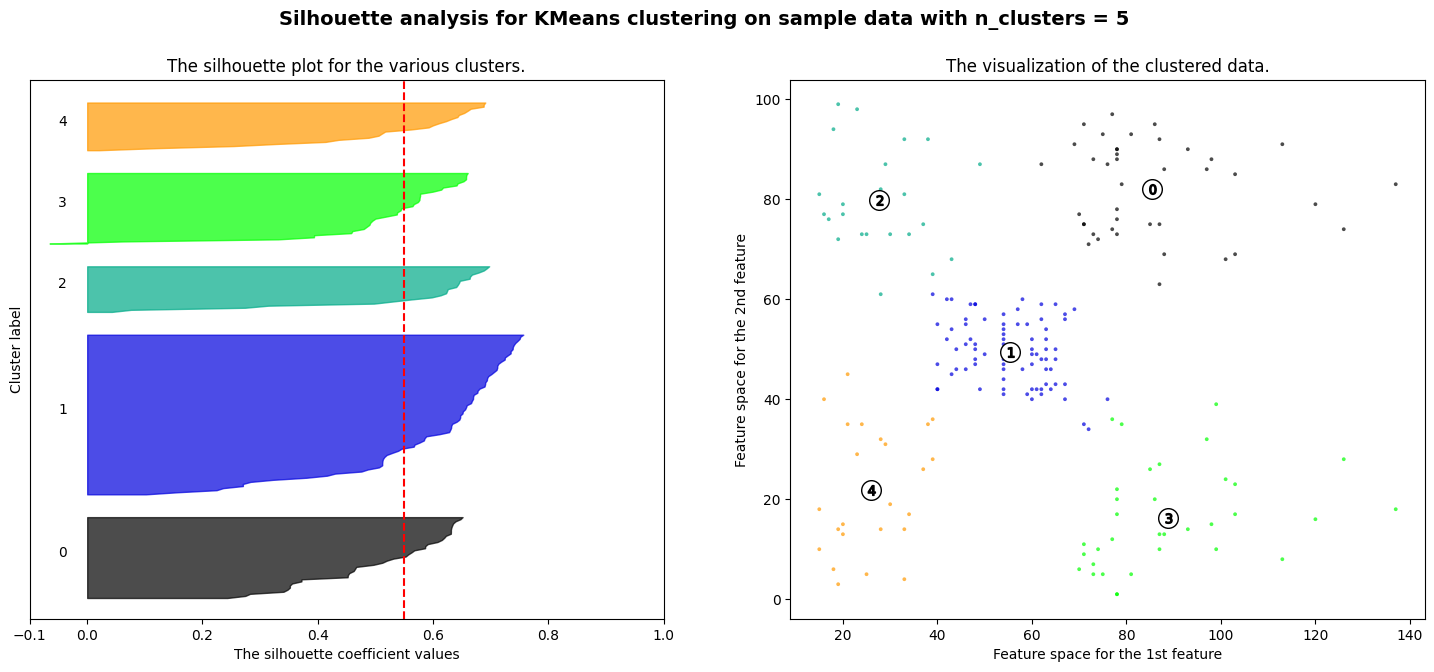

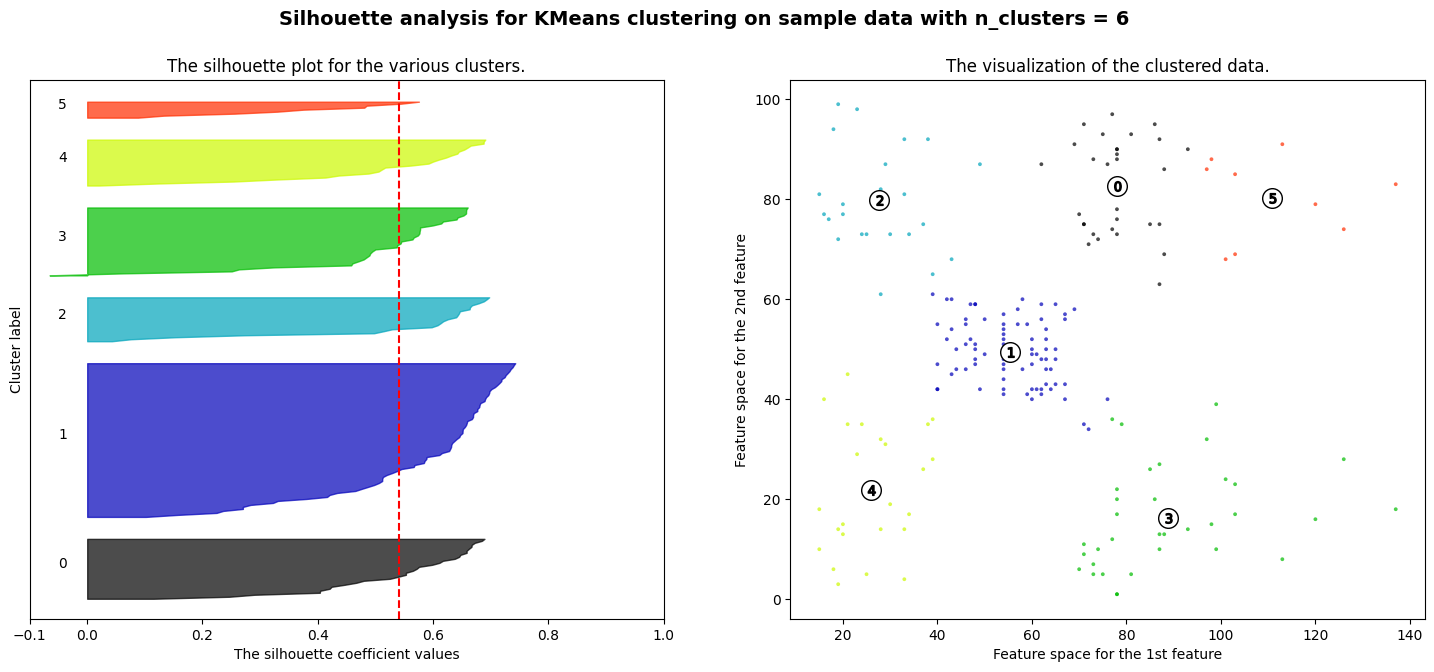

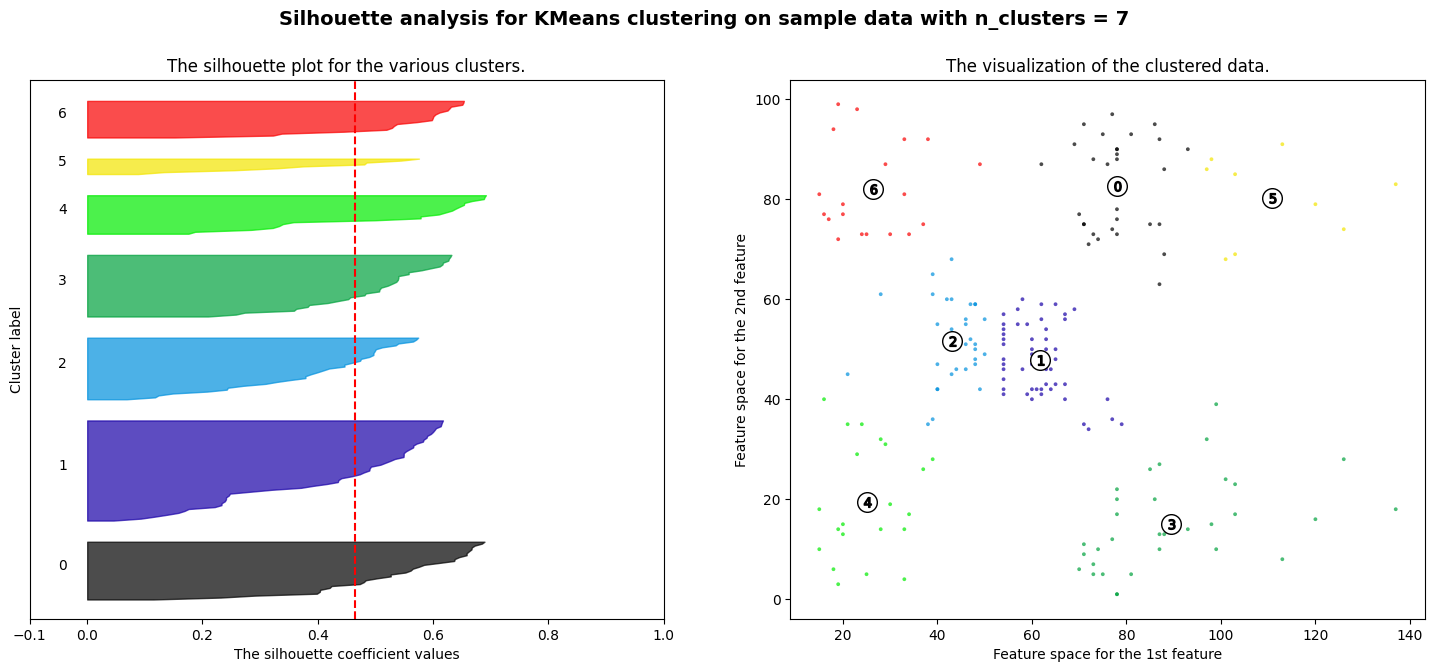

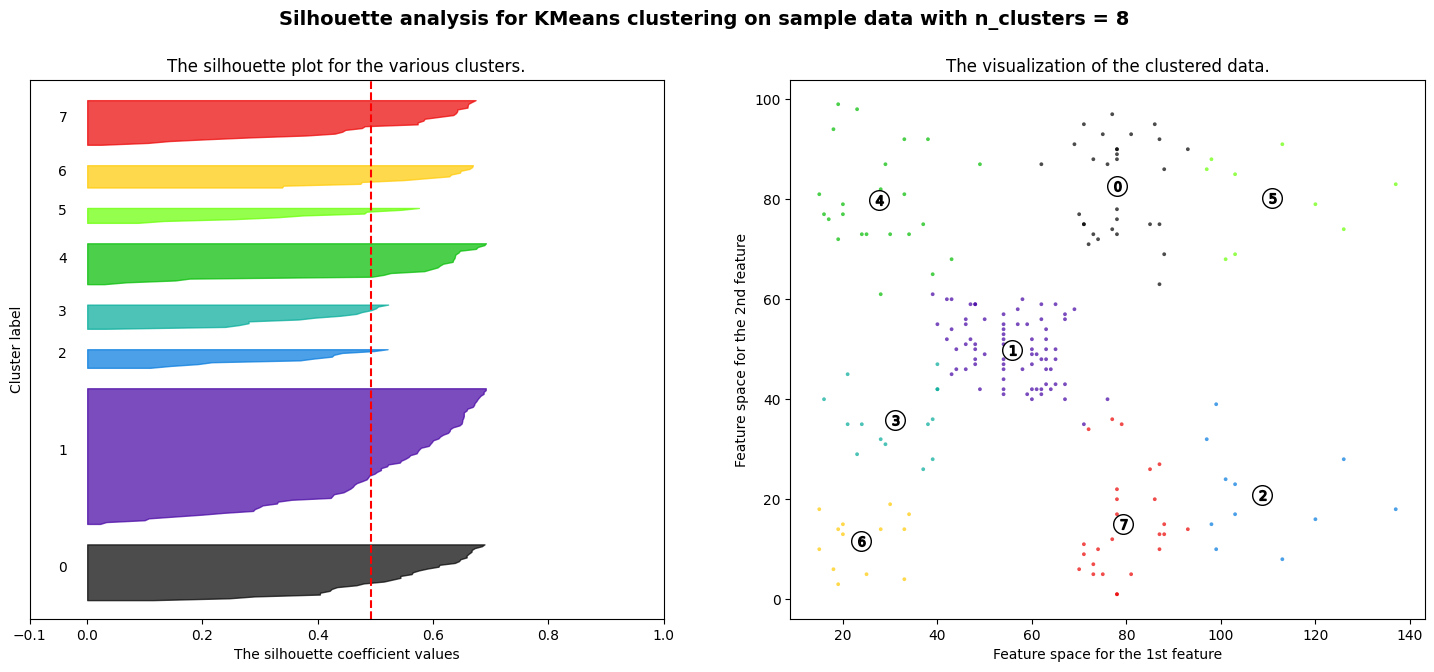

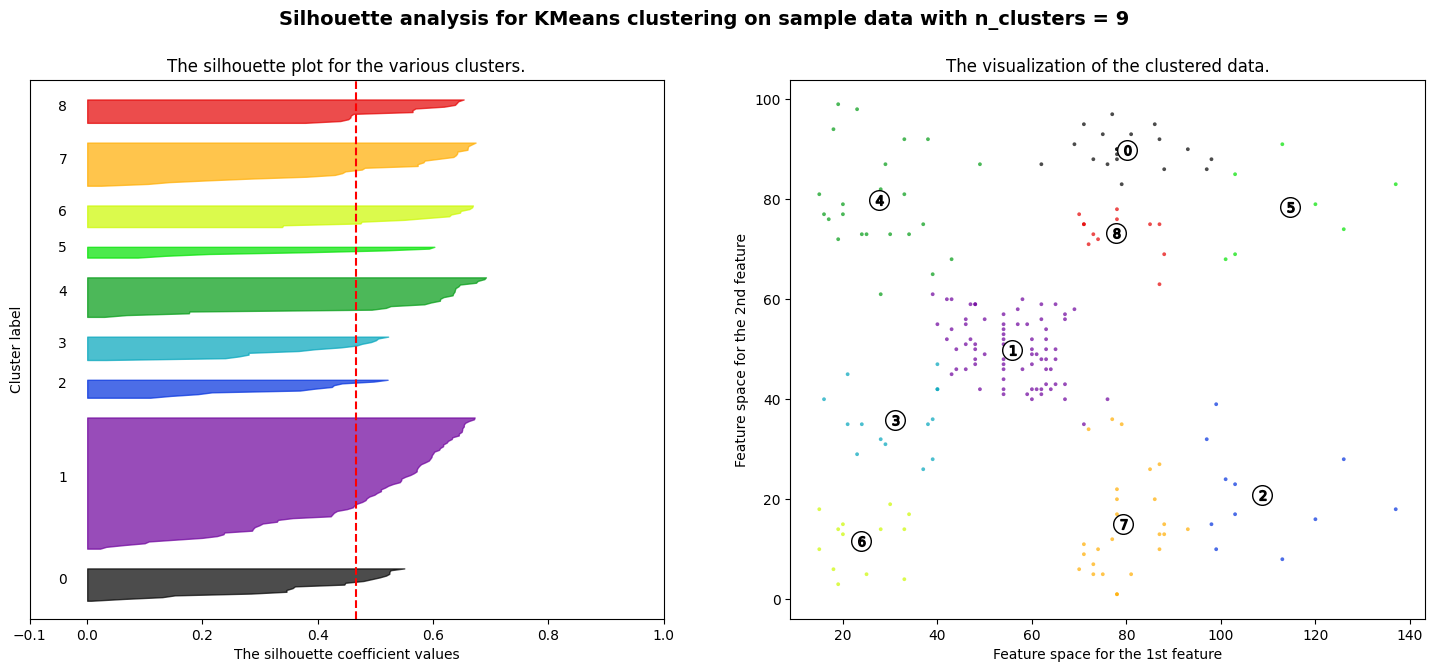

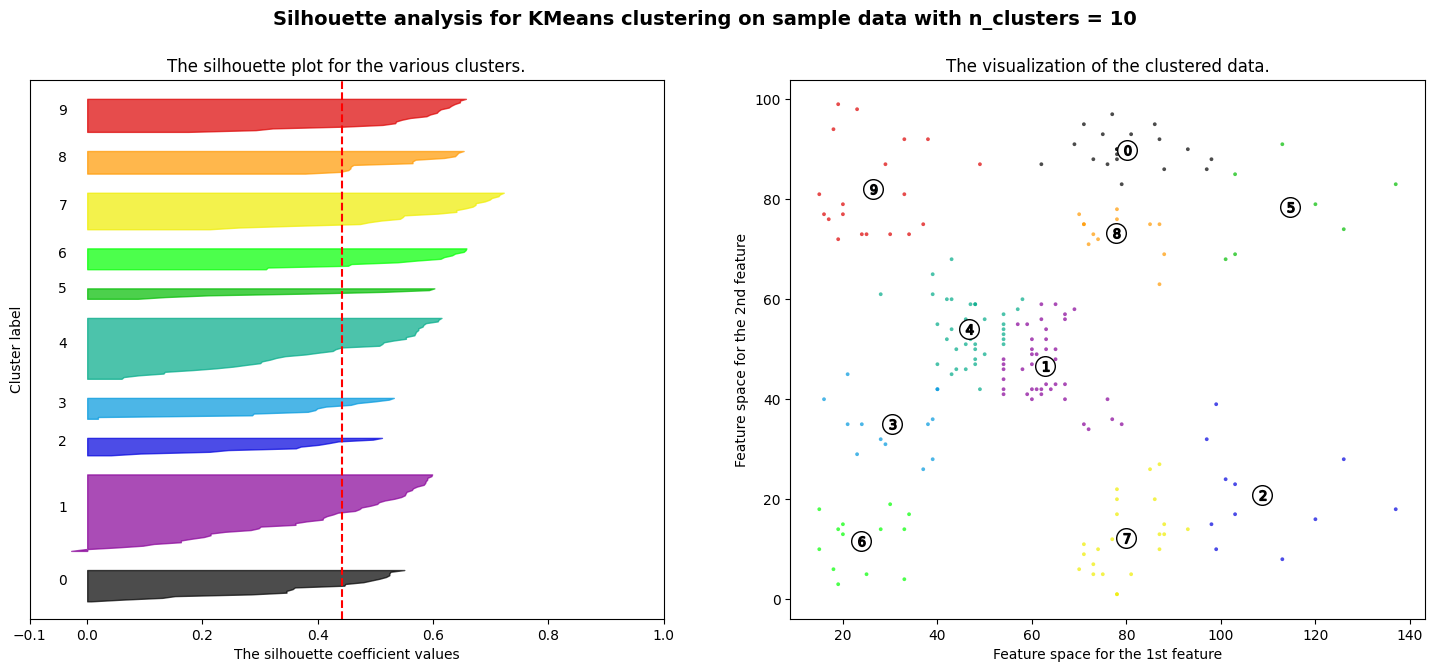

In [ ]:
# Skor Silhouette (pelajari jarak pemisahan antara cluster yang dihasilkan)
# seberapa dekat setiap titik dalam satu klaster dengan titik-titik di klaster tetangga
# dengan demikian menyediakan cara untuk menilai parameter seperti jumlah cluster secara visual
import numpy as np

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

- For n_clusters = 2 The average silhouette_score is : 0.37371366304248604
- For n_clusters = 3 The average silhouette_score is : 0.4636138647535812
- For n_clusters = 4 The average silhouette_score is : 0.4163108919087584
- For n_clusters = 5 The average silhouette_score is : 0.550339772174294
- For n_clusters = 6 The average silhouette_score is : 0.5402498169001342
- For n_clusters = 7 The average silhouette_score is : 0.46528466159403364
- For n_clusters = 8 The average silhouette_score is : 0.49247656039513293
- For n_clusters = 9 The average silhouette_score is : 0.4668098763038981
- For n_clusters = 10 The average silhouette_score is : 0.44212731918355

Secara keseluruhan, skor silhouette mencapai puncak pada 5 klaster, dengan nilai sekitar 0,55. Ini menunjukkan bahwa 5 klaster merupakan jumlah optimal untuk mewakili struktur data dengan baik. Visualisasi data terkumpul juga mendukung hal ini, di mana lima klaster terlihat terbentuk dengan jelas dan terpisah satu sama lain.

In [ ]:
#selecting feature (use iloc iloc as integer index-based. So here, we have to specify rows and columns by their integer index.)
# 2 Age, 3 column of income, 4 column of score
Z_numerics = df_customer.iloc[:,[2,3,4]].values

In [ ]:
Z_numerics = df_customer[['age','income', 'score']] # subset with numerical only

In [ ]:
KM_clusters = KMeans(n_clusters=5, init='k-means++').fit(Z_numerics) # initialise and fit K-Means model

KM_clustered = Z_numerics.copy()
KM_clustered.loc[:,'Cluster'] = KM_clusters.labels_ # append labels to points

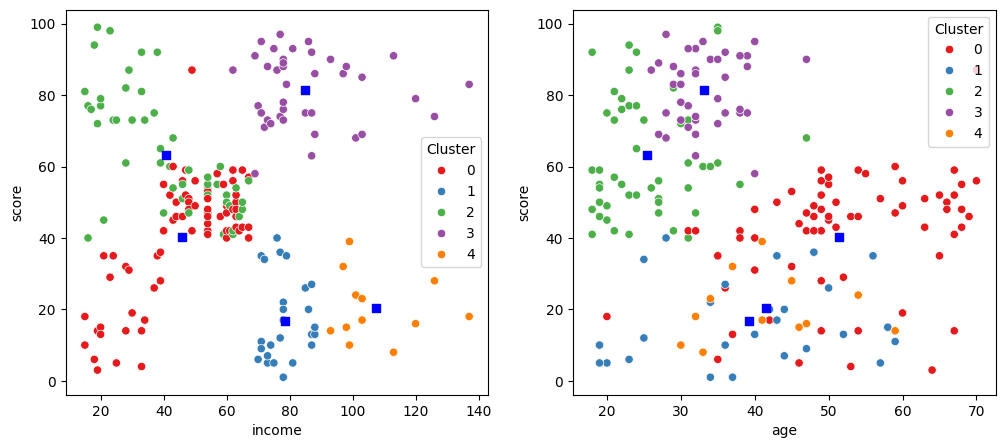

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='income', y='score', data=KM_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='age', y='score', data=KM_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_clusters.cluster_centers_[:,1],KM_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_clusters.cluster_centers_[:,0],KM_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

Dapat dilihat dari scatterplot x=income dengan y=score lebih terbentuk dan data berada pada clusternya tidak seperti (x=age dengan y=score) data menyebar dan tidak terbentuk pada clusterya.

Algoritma K-Means menghasilkan 5 cluster berikut:

-	Cluster 0 konsumen dengan annual income tinggi dengan range 60-140 dan spending score dengan range 60-100
-	Cluster 1 konsumen dengan annual income tinggi dengan range 20-70 dan spending score dengan rage 40-80
-	Cluster 2 konsumen dengan annual income sedang dengan range 70-100 dan spending score dengan range 0-40
-	Cluster 3 konsumen dengan annual income rendah dengan range 0-40 dan spending score dengan range 0-40
-	Cluster 4 konsumen dengan annual income rendah dengan range 0-40 dan spending score dengan range 20-60



# **Melihat jumlah data pada setiap cluster**

In [ ]:
#Sizes of the clusters:
KM_clust_sizes = KM_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,70
1,26
2,51
3,41
4,12


Interpretasi
1. Cluster 0 terdiri atas 40 data atau customer.
2. Cluster 1 terdiri atas 23 data atau customer.
3. Cluster 2 terdiri atas 36 data atau customer.
4. Cluster 3 terdiri atas 78 data atau customer.
5. Cluster 4 terdiri atas 23 data atau customer.

# **Visualisasikan cluster dengan 3D plot**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM_clustered['age'],
           KM_clustered['income'],
           KM_clustered['score'],
           c=KM_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

<Figure size 700x700 with 0 Axes>

In [ ]:
# Below a Plotly version:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['age'],
        y = db[db['Cluster']==n]['score'],
        z = db[db['Cluster']==n]['income'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM_clustered, 0, 'Cluster 0')
trace1 = tracer(KM_clustered, 1, 'Cluster 1')
trace2 = tracer(KM_clustered, 2, 'Cluster 2')
trace3 = tracer(KM_clustered, 3, 'Cluster 3')
trace4 = tracer(KM_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

interpretasi

Cluster 0
dengan x = Age
y = Score
z = Income

## DBSCAN

Density-Based Spatial Clustering Algorithm with noise (DBSCAN) adalah algoritma pengelompokan yang didasarkan pada kepadatan (density) data. Konsep kepadatan dalam DBSCAN menghasilkan tiga macam status dari setiap data, yaitu inti (core), batas (border), dan noise.

In [ ]:
from sklearn.cluster import DBSCAN

Untuk memilih kombinasi terbaik dari parameter algoritma, buatlah matriks kombinasi.

In [ ]:
#first create a matrix of investigated combinations.
from itertools import product

eps_values = np.arange(8,12.75,0.25) # nilai eps untuk diselidiki
min_samples = np.arange(3,10) # nilai min_samples yang akan diselidiki
DBSCAN_params = list(product(eps_values, min_samples))

**Mengumpulkan jumlah cluster yang dihasilkan**

In [ ]:
#Colecting number of generated clusters.
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(Z_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(Z_numerics, DBS_clustering.labels_))

Heat plot di bawah ini menunjukkan berapa banyak cluster yang dihasilkan oleh algoritme untuk kombinasi parameter masing-masing

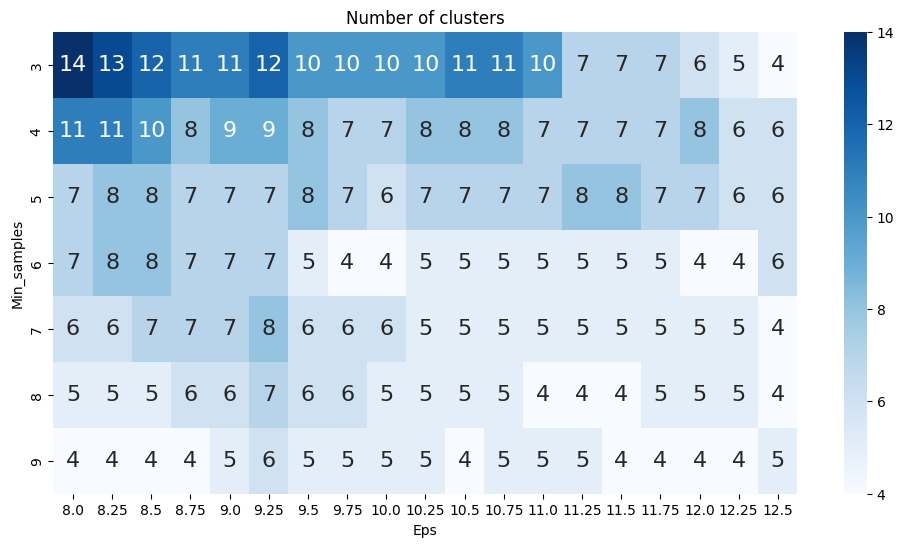

In [ ]:
#A heatplot to shows how many clusters were genreated by the algorithm for the respective parameters combinations.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="Blues", ax=ax)
ax.set_title('Number of clusters')
plt.show()

Semakin besar nilai Eps, semakin sedikit jumlah kluster yang terbentuk.
Hal ini menunjukkan bahwa semakin besar jarak maksimum antar titik yang dianggap berada dalam satu kluster, maka semakin banyak titik data yang akan digabungkan menjadi satu kluster.
Dengan kata lain, semakin besar nilai Eps, semakin longgar kriteria pengelompokan titik data ke dalam kluster.

Wilayah dengan jumlah kluster terbanyak:
- Wilayah dengan nilai Eps antara 8,0 dan 8,25, serta nilai Min_samples sekitar 3, menghasilkan jumlah kluster terbanyak, yaitu 15 kluster.
Ini menunjukkan bahwa pada kombinasi parameter tersebut, algoritma dapat memisahkan data menjadi lebih banyak kluster yang berbeda. Memberikan informasi tentang pengaturan parameter yang dapat menghasilkan clustering paling detail atau granular.

- Wilayah dengan jumlah kluster terkecil:
Wilayah dengan nilai Eps sekitar 12,0 hingga 12,5, dan nilai Min_samples sekitar 14, menghasilkan jumlah kluster terkecil, yaitu hanya 3 kluster.
Hal ini berarti pada kombinasi parameter tersebut, algoritma mengelompokkan data menjadi sedikit kluster yang lebih kompak dan padat. Menunjukkan pengaturan parameter yang dapat menghasilkan clustering paling sederhana atau agregat.

Cluster yang terbentuk adalah 2-15

Parameter

1.   Epsilon (Eps) adalah jarak terkecil yang diperlukan untuk dua titik untuk disebut sebagai tetangga. Eps sebagai ambang batas untuk mempertimbangkan dua titik sebagai tetangga.
2.   min_samples adalah jumlah sampel (atau berat total) di lingkungan untuk suatu titik dianggap sebagai titik inti.



# **Global Maximum adalah 0,25 untuk eps = 12,25 dan min_samples = 3.**

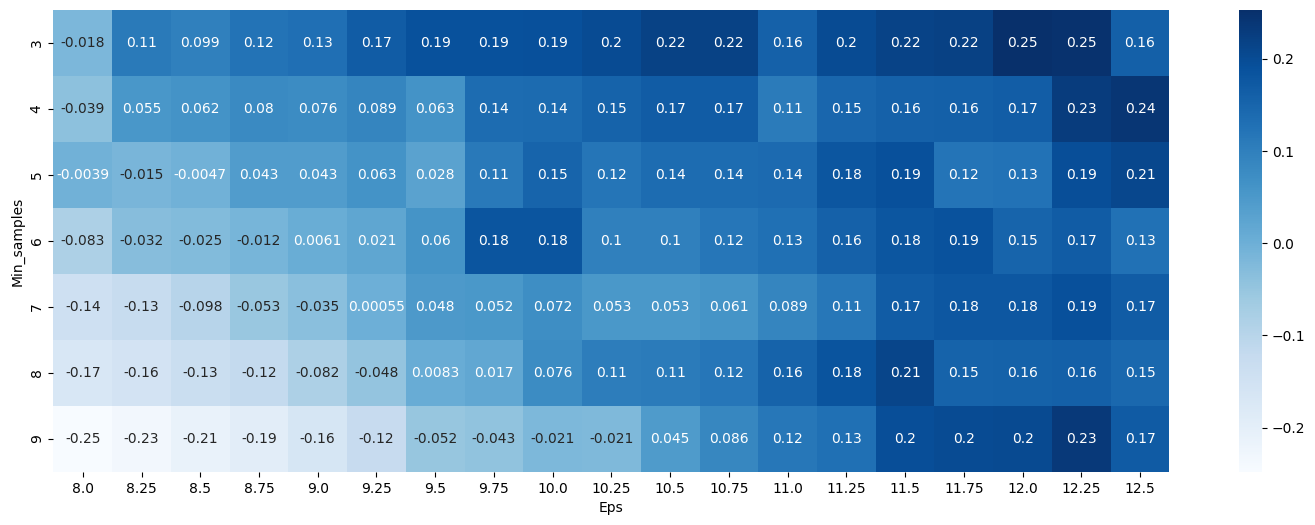

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="Blues", ax=ax)
plt.show()

Dari data Nilai global maksimum 0.25 (nilai terbesar dalam data) dan eps 12.25 di min_sampel = 3

# **Melihat jumlah data pada setiap cluster**

In [ ]:
DBS_clustering = DBSCAN(eps=12.25, min_samples=3).fit(Z_numerics)

DBSCAN_clustered = Z_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,23
0,115
1,35
2,5
3,22


DBSCAN membuat 4 cluster ditambah outlier cluster (-1). Ukuran cluster 0-4 sangat bervariasi.
- untuk cluster 0 memiliki 115 data.
- untuk cluster 1 memiliki 35 data.
- untuk cluster 2 hanya memiliki 5 data.
- untuk cluster 3 memiliki 22 data.

Jadi, nilai -1 pada Cluster menunjukkan adanya data yang tidak termasuk ke dalam kluster manapun, yang merupakan bagian dari karakteristik hasil clustering menggunakan algoritma DBSCAN.

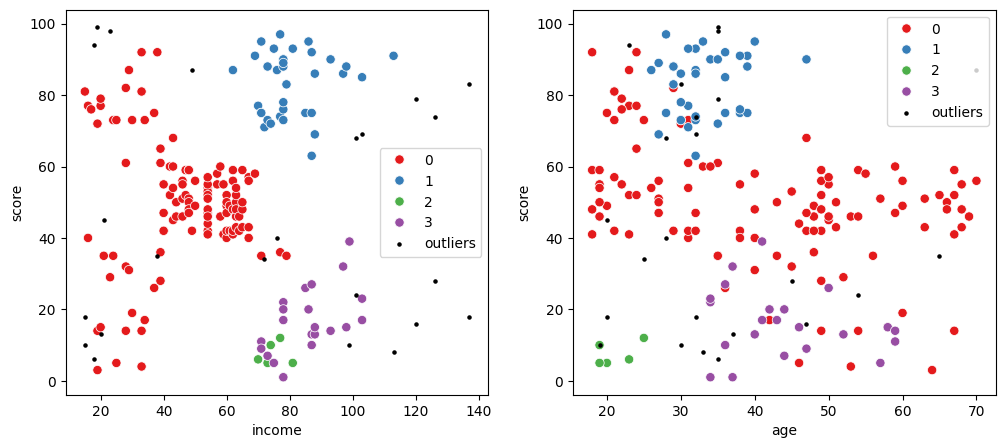

In [ ]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='income', y='score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='age', y='score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['income'], outliers['score'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['age'], outliers['score'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

Grafik di atas menunjukkan bahwa terdapat beberapa outlier – titik-titik tersebut tidak memenuhi syarat jarak dan minimum sampel untuk diakui sebagai sebuah cluster.

## COMPARISON

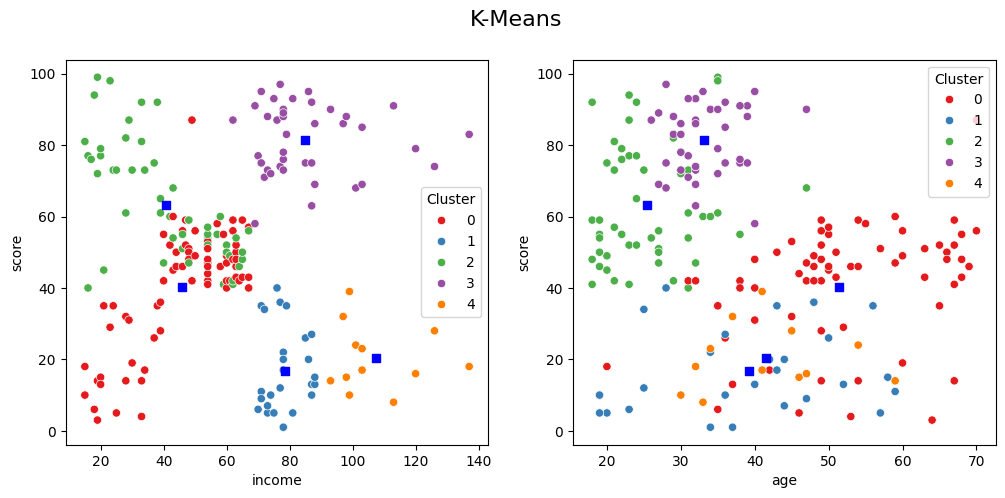

In [ ]:
fig1.suptitle('K-Means', fontsize=16)
fig1

In [ ]:
clusters = pd.concat([KM_clust_sizes, DBSCAN_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size
Cluster,,
0,70.0,115.0
1,26.0,35.0
2,51.0,5.0
3,41.0,22.0
4,12.0,NaN
-1,NaN,23.0


Dari perbandingan di atas, terlihat jelas bahwa DBSCAN gagal menghasilkan cluster yang wajar. Ini karena masalah dalam mengenali cluster dengan berbagai kepadatan (dalam dataset ini). Kmeans menciptakan cluster yang baik, berjumlah 5 dan lebih proporsional dibanding DBSCan.

NaN = di cluster tersebut 0 data

***Data Standardization***

In [ ]:
# Importing Standardscalar Module
from sklearn.preprocessing import StandardScaler

# Set Name for StandardScaler as scaler
scaler = StandardScaler()

# Select Data
df_standardized = df_customer[['age',	'income',	'score']]

# Fit Standardization
column_names = df_standardized.columns.tolist()
df_standardized[column_names] = scaler.fit_transform(df_standardized[column_names])
df_standardized.sort_index(inplace=True)
df_standardized

,age,income,score
0,-1.424569,-1.737490,-1.547007
1,-1.281035,-1.737490,1.174437
10,2.020232,-1.584911,-1.393686
100,-1.137502,0.055310,-0.358771
101,0.728432,0.055310,-0.090459
...,...,...,...
95,-1.065735,-0.020980,0.062862
96,0.584899,-0.020980,-0.128789
97,-0.850435,-0.020980,-0.013799
98,0.656665,0.017165,-0.320441


Interprestasi :

## Hierarchical Clustering (visualization)

Hierarchical yaitu membuat visualisasi dari cluster secara hirarki atau dendogram.

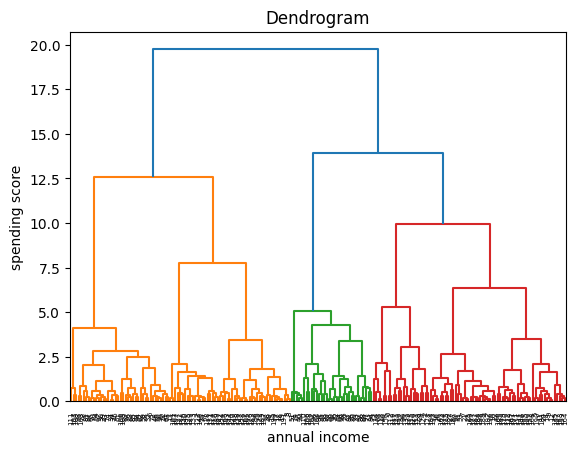

In [ ]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(df_standardized, method='ward'))
plt.title('Dendrogram')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.rcParams["figure.figsize"] = [8,4]
plt.show()

Secara keseluruhan, dendrogram ini memberikan informasi tentang struktur pengelompokan data berdasarkan fitur 'annual income' dan 'spending score'. Analisis dendrogram ini dapat membantu dalam memahami pola dan karakteristik data serta menentukan jumlah kluster yang sesuai untuk analisis selanjutnya.